In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170295296/170498071 [============================>.] - ETA: 0s

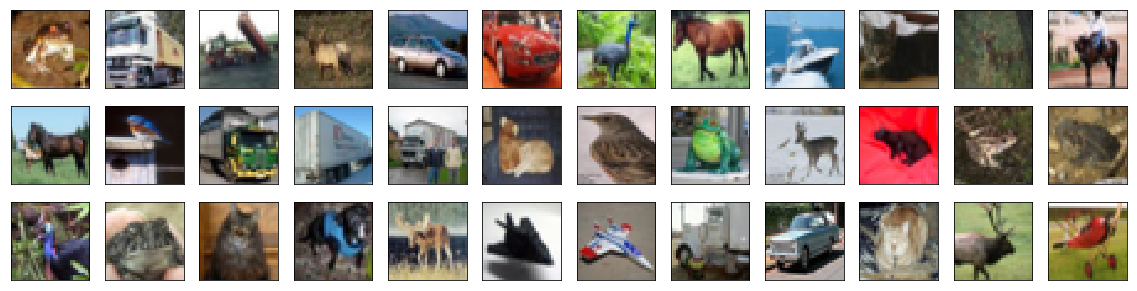

In [2]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
"""
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()
"""
model.add(Conv2D(32, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), strides= (1,1) ,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides = None))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), strides= (1,1) ,padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), strides= (1,1) ,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides = None))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='best-model', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 16s - loss: 0.4999 - acc: 0.8233 - val_loss: 0.6004 - val_acc: 0.7976
Epoch 2/100
45000/45000 [==============================] - 15s - loss: 0.4913 - acc: 0.8243 - val_loss: 0.6106 - val_acc: 0.7948
Epoch 3/100
45000/45000 [==============================] - 15s - loss: 0.4857 - acc: 0.8268 - val_loss: 0.6158 - val_acc: 0.7954
Epoch 4/100
45000/45000 [==============================] - 16s - loss: 0.4698 - acc: 0.8330 - val_loss: 0.5809 - val_acc: 0.7982
Epoch 5/100
45000/45000 [==============================] - 15s - loss: 0.4600 - acc: 0.8354 - val_loss: 0.5994 - val_acc: 0.7944
Epoch 6/100
45000/45000 [==============================] - 15s - loss: 0.4571 - acc: 0.8360 - val_loss: 0.5908 - val_acc: 0.8006
Epoch 7/100
45000/45000 [==============================] - 15s - loss: 0.4453 - acc: 0.8402 - val_loss: 0.5935 - val_acc: 0.8022
Epoch 8/100
45000/45000 [=======================

45000/45000 [==============================] - 15s - loss: 0.2865 - acc: 0.9005 - val_loss: 0.6136 - val_acc: 0.8060
Epoch 66/100
45000/45000 [==============================] - 15s - loss: 0.2816 - acc: 0.8996 - val_loss: 0.6060 - val_acc: 0.8170
Epoch 67/100
45000/45000 [==============================] - 15s - loss: 0.2785 - acc: 0.9036 - val_loss: 0.6090 - val_acc: 0.8174
Epoch 68/100
45000/45000 [==============================] - 15s - loss: 0.2750 - acc: 0.9038 - val_loss: 0.6405 - val_acc: 0.8094
Epoch 69/100
45000/45000 [==============================] - 15s - loss: 0.2797 - acc: 0.9027 - val_loss: 0.6652 - val_acc: 0.8018
Epoch 70/100
45000/45000 [==============================] - 15s - loss: 0.2797 - acc: 0.9024 - val_loss: 0.6021 - val_acc: 0.8104
Epoch 71/100
45000/45000 [==============================] - 15s - loss: 0.2778 - acc: 0.9045 - val_loss: 0.6443 - val_acc: 0.8126
Epoch 72/100
45000/45000 [==============================] - 15s - loss: 0.2782 - acc: 0.9016 - val_loss

In [13]:
model.load_weights('best-model')

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.798


In [15]:
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

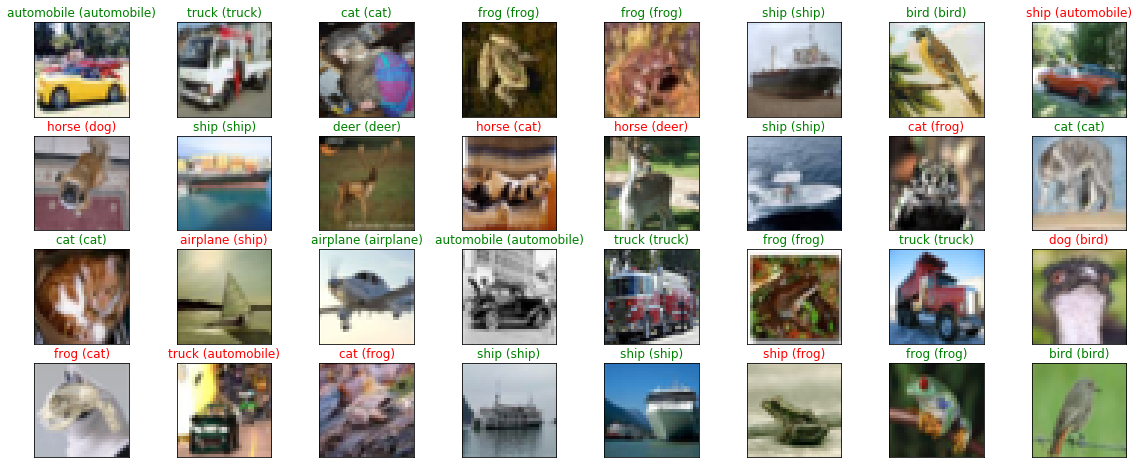

In [16]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))